<style>
    .cont {
        display: flex;
        justify-content: center;
        flex-direction: column;
    }

    .cont span {
        margin:auto;
    }
    .name {
        display:inline-block;
        background-color: green;
        padding: 10px;
        border-radius: 20px;
        margin:auto;
    }
    .class {
        display:inline-block;
        background-color: purple;
        padding: 10px;
        border-radius: 20px;
        margin:auto;
    }
    .assignment {
        display:inline-block;
        background-color: white;
        color: black;
        font-weight: bolder;
        font-size: 60px;
        padding: 10px;
    }
</style>

<div class="cont">
    <span><span class="assignment">Programming Assignment 1 -</span><span class="assignment">Imputing</span></span>
    <br>
    <span><span class="name">Víctor Carnicero Príncipe</span><span class="name">123123895</span></span>
    <br>
    <span><span class="class">COMPUTATIONAL MACHINE LEARNING</span><span class="class">CS4705</span></span>
</div>

Víctor Carnicero Príncipe | 123123895 || COMPUTATIONAL MACHINE LEARNING | CS4705

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
org_data = pd.read_csv('./diabetes.csv', header=0)

In [3]:
# Replace the missing values with NaN
org_data[org_data == "?"] = np.nan

# Preprocessing and Analysis

You can skip this section if you want.

Summary of the changes:

+ `Pregnancy`, `DiabetesPedigreeFunction`, `Age` and `Outcome` values kept
+ `Glucose` values == 0 removed.
+ `BloodPressure` values == 0 removed.
   - Remark: People in the sample seem to have mostly low pressure.
+ `SkinThickness` values == 0 and 99 removed.
   - 99 may be a real value but since it is an extreme outlier it is removed.
+ `BMI` values == 0 removed.

All the other variable's values seem to make sense.

## Pregnancy analysis:

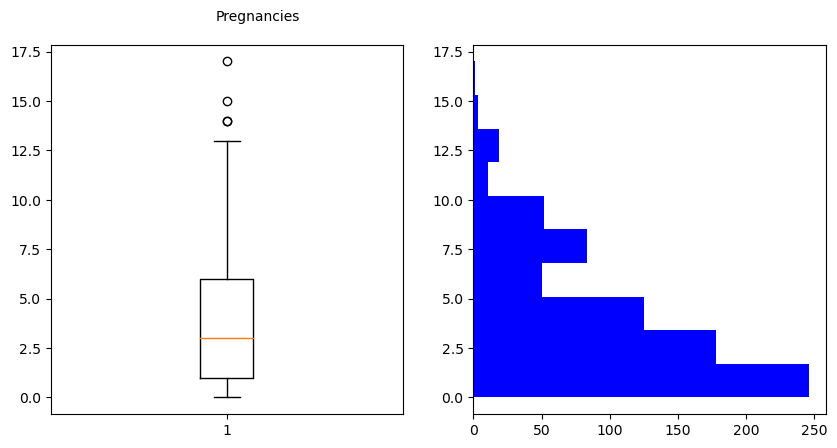

In [4]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "Pregnancies")
ax[0].boxplot(org_data["Pregnancies"])
ax[1].hist(org_data["Pregnancies"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

The data does show some extreme values, but they do seem to belong in the data and may contribute positively for the model, so I will keep all of the values.

## Glucose analysis:

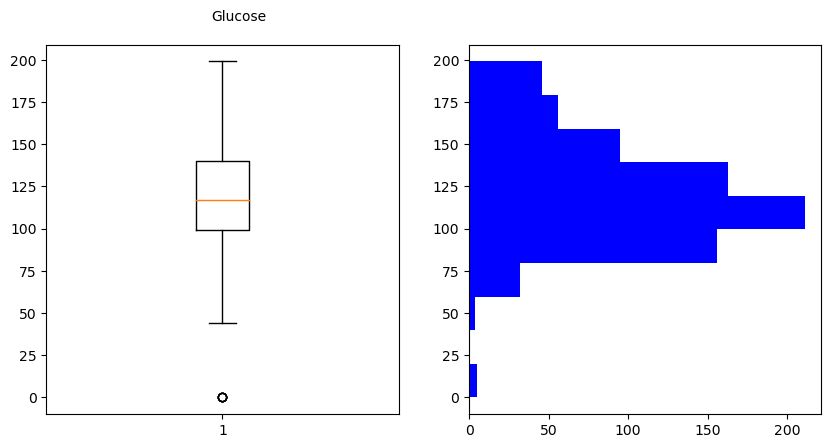

In [5]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "Glucose")
ax[0].boxplot(org_data["Glucose"][~np.isnan(org_data["Glucose"])])
ax[1].hist(org_data["Glucose"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

I do not really know about how glucose works but it is a bit strange to have 0 glucose, specially since the lowest one before is 44, and then 5 people have exactly 0. It is possible that the tests were not carried, so I set these values to nan.

In [6]:
print("Lowest glucose levels before 0:", org_data[org_data["Glucose"] > 25].min()["Glucose"])
org_data[org_data["Glucose"] < 25]

Lowest glucose levels before 0: 44.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
# Set glucose = 0 -> nan
org_data.loc[org_data["Glucose"] == 0, "Glucose"] = np.nan

## Blood Pressure analysis:

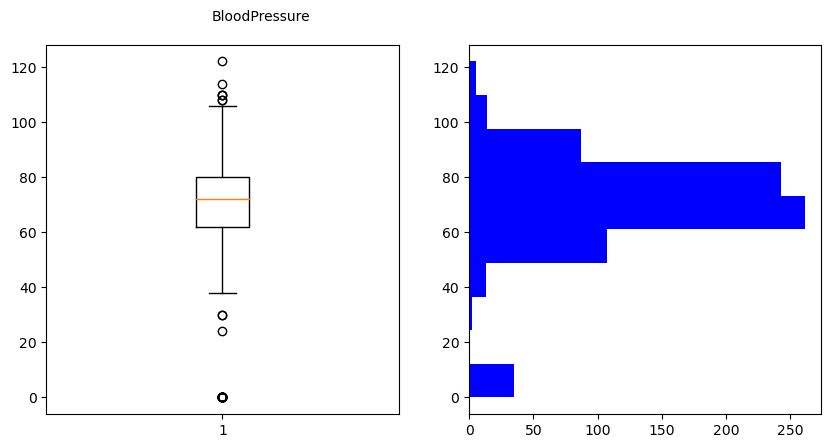

In [8]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "BloodPressure")
ax[0].boxplot(org_data["BloodPressure"][~np.isnan(org_data["BloodPressure"])])
ax[1].hist(org_data["BloodPressure"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

I just want to say these people have unnormal low blood pressure, low blood pressure is considered as anything below 90/60 mm Hg. And that is at least 87.63% of the people in the sample.

Also considering that diabetic people tend to have higher blood pressure than non-diabetic population this appears to be a very strange dataset.

(I do not have deep knoweledge about how diabetes works, or how is the blood pressure for other people of the population, so this may not be strange at all, I am just judging basing myself on information I searched for on the internet).

In [9]:
# People with low pressure not counting those with 0
str(org_data[(org_data["BloodPressure"] < 90) & (org_data["BloodPressure"] != 0)].shape[0] / org_data.shape[0] * 100) + "%"

'87.63020833333334%'

In this case set the value `0` to Nan again, since it is probably not the correct value.

In [10]:
org_data.loc[org_data["BloodPressure"] == 0, "BloodPressure"] = np.nan

There is still people with blood pressure below 40, which is unlikely, but since it is not a lot of people I am not going to change it.

## Skin Thickness analysis:

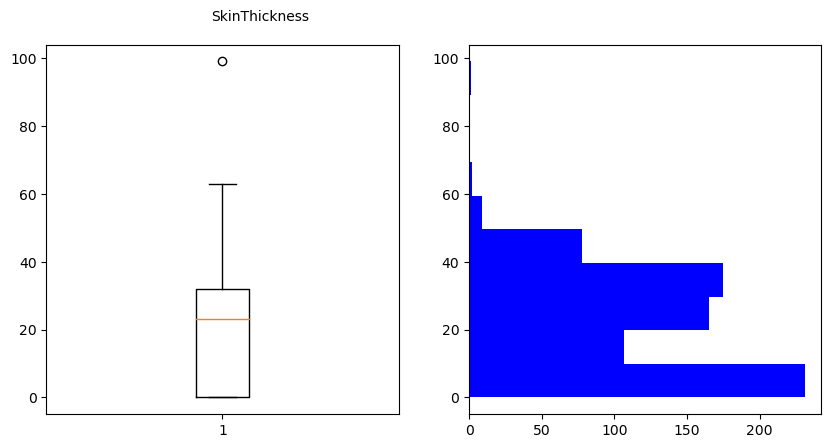

In [11]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "SkinThickness")
ax[0].boxplot(org_data["SkinThickness"][~np.isnan(org_data["SkinThickness"])])
ax[1].hist(org_data["SkinThickness"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

In [12]:
# Analyze the number of people with skin thickness 0
org_data[org_data["SkinThickness"] == 0].shape[0]

227

It is also very unlikely that people show a skin thickness of 0, being that the lowest one before is 7mm.

There is also an individual that shows a skin thickness as high as 99mm, so I am going to delete both values.

It is possible that the 99mm one may be true but I think keeping it may be bad for the model.

In [13]:
# Deleting desired values
org_data.loc[(org_data["SkinThickness"] == 0) | (org_data["SkinThickness"] == 99), "SkinThickness"] = np.nan

In [14]:
# Some visualization of the new data
org_data[org_data["SkinThickness"] != 0].sort_values(by="SkinThickness")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
519,6,129.0,90.0,7.0,326,19.6,0.582,60,0
254,12,92.0,62.0,7.0,258,27.6,0.926,44,1
434,1,90.0,68.0,8.0,0,24.5,1.138,36,0
382,1,109.0,60.0,8.0,182,25.4,0.947,21,0
466,0,74.0,52.0,10.0,36,27.8,0.269,22,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,NaN,0,36.3,0.258,52,1
758,1,106.0,76.0,NaN,0,37.5,0.197,26,0
759,6,190.0,92.0,NaN,0,35.5,0.278,66,1
762,9,89.0,62.0,NaN,0,22.5,0.142,33,0


## Insulin analysis:

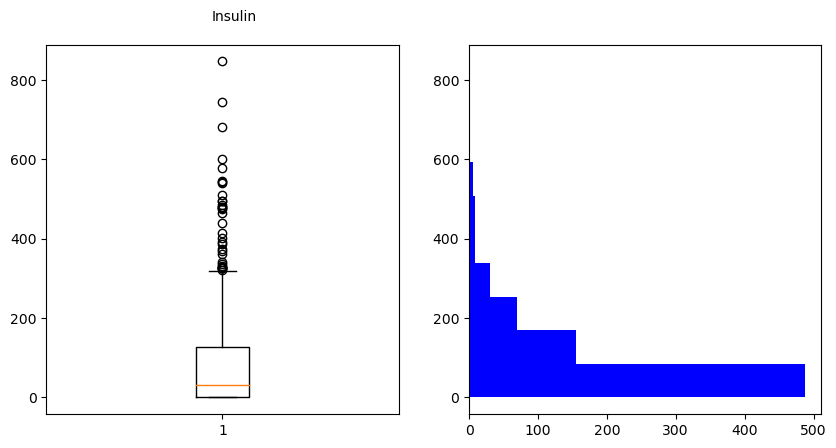

In [15]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "Insulin")
ax[0].boxplot(org_data["Insulin"][~np.isnan(org_data["Insulin"])])
ax[1].hist(org_data["Insulin"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

In [16]:
org_data[org_data["Insulin"] != 0].sort_values(by="Insulin")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.0,63.0,14,59.4,2.420,25,1
617,2,68.0,62.0,13.0,15,20.1,0.257,23,0
760,2,88.0,58.0,26.0,16,28.4,0.766,22,0
566,1,99.0,72.0,30.0,18,38.6,0.412,21,0
108,3,83.0,58.0,31.0,18,34.3,0.336,25,0
...,...,...,...,...,...,...,...,...,...
409,1,172.0,68.0,49.0,579,42.4,0.702,28,1
584,8,124.0,76.0,24.0,600,28.7,0.687,52,1
247,0,165.0,90.0,33.0,680,52.3,0.427,23,0
228,4,197.0,70.0,39.0,744,36.7,2.329,31,0


I also delete the values for insulin = 0 because they are also probably not true values.

About the values in the higher end, I do not know if they are significant or not, so I am not going to remove them.

In [17]:
# Deleting the values
org_data.loc[org_data["Insulin"] == 0, "Insulin"] = np.nan

## BMI analysis:

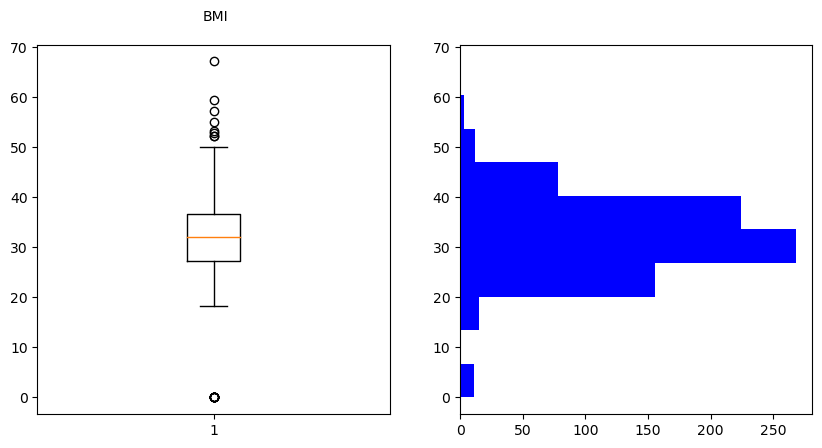

In [18]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "BMI")
ax[0].boxplot(org_data["BMI"][~np.isnan(org_data["BMI"])])
ax[1].hist(org_data["BMI"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

Also set BMI = 0 to Nan

In [19]:
org_data.loc[org_data["BMI"] == 0, "BMI"] = np.nan

## DiabetesPedigreeFunction analysis:

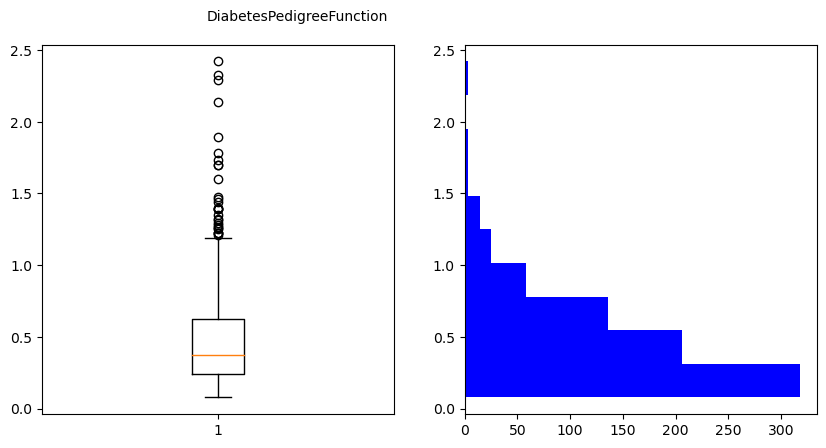

In [20]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "DiabetesPedigreeFunction")
ax[0].boxplot(org_data["DiabetesPedigreeFunction"][~np.isnan(org_data["DiabetesPedigreeFunction"])])
ax[1].hist(org_data["DiabetesPedigreeFunction"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

In [21]:
# Closer visualization of the lower values
org_data[org_data["DiabetesPedigreeFunction"] != 0].sort_values(by="DiabetesPedigreeFunction")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
268,0,102.0,52.0,NaN,NaN,25.1,0.078,21,0
180,6,87.0,80.0,NaN,NaN,23.2,0.084,32,0
149,2,90.0,70.0,17.0,NaN,27.3,0.085,22,0
567,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0
135,2,125.0,60.0,20.0,140.0,33.8,0.088,31,0
...,...,...,...,...,...,...,...,...,...
45,0,180.0,66.0,39.0,NaN,42.0,1.893,25,1
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0


I do not really know what this label represents, so since the values seem to make sense I am going to keep all the values.

## Age analysis:

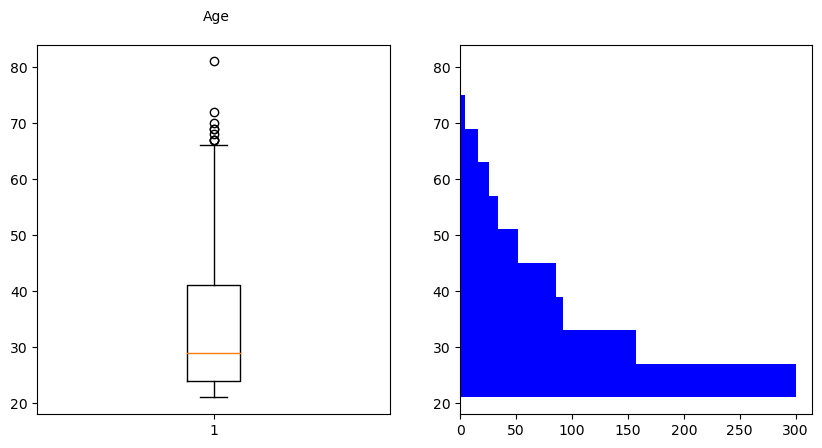

In [22]:
p, ax = plt.subplots(1, 2)

p.text(0.29, 0.93, "Age")
ax[0].boxplot(org_data["Age"][~np.isnan(org_data["Age"])])
ax[1].hist(org_data["Age"], orientation='horizontal', color="blue")
p.set_figwidth(10)
plt.show()

I do not see any issues with the ages, so I am going to keep all of the values.

## Outcome analysis:

[]

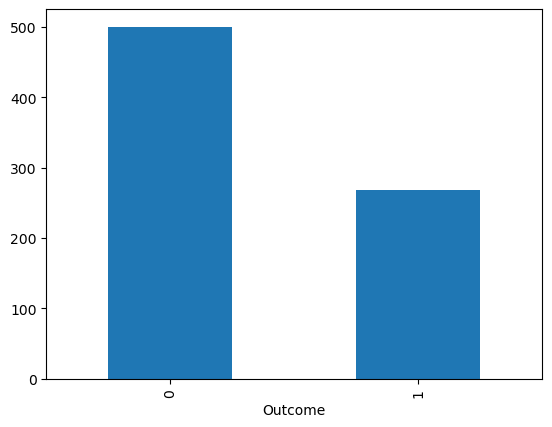

In [24]:
org_data.groupby("Outcome").size().plot(kind="bar")
plt.plot()

I do not see any issues with the outcome, can only observe that Outcome 0 is more abundant than Outcome 1.

# Missingness analysis:

You can also skip this section if you want, I analize a bit where the missing values are, doing some visualization on the data.
This is for my personal understanding of the data.

In [25]:
import missingno as msno

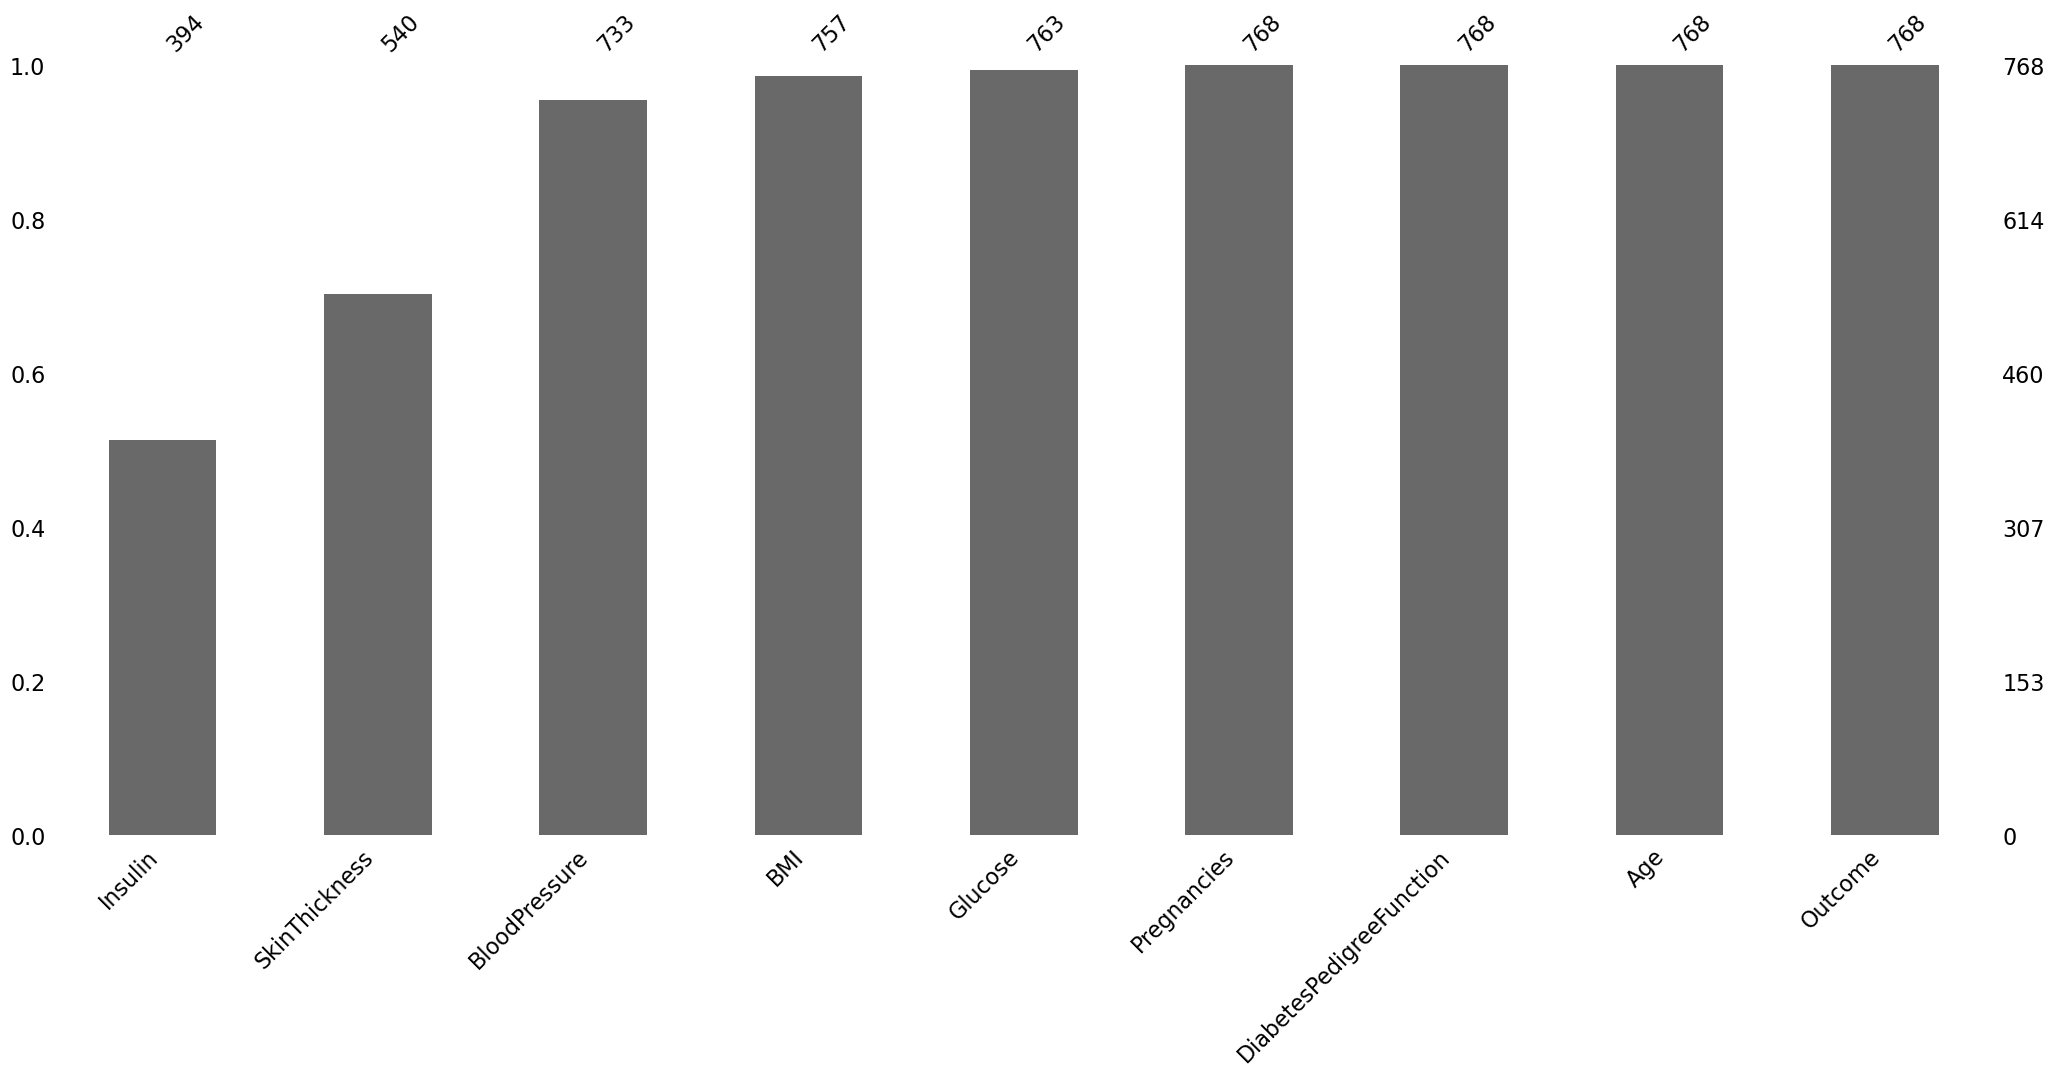

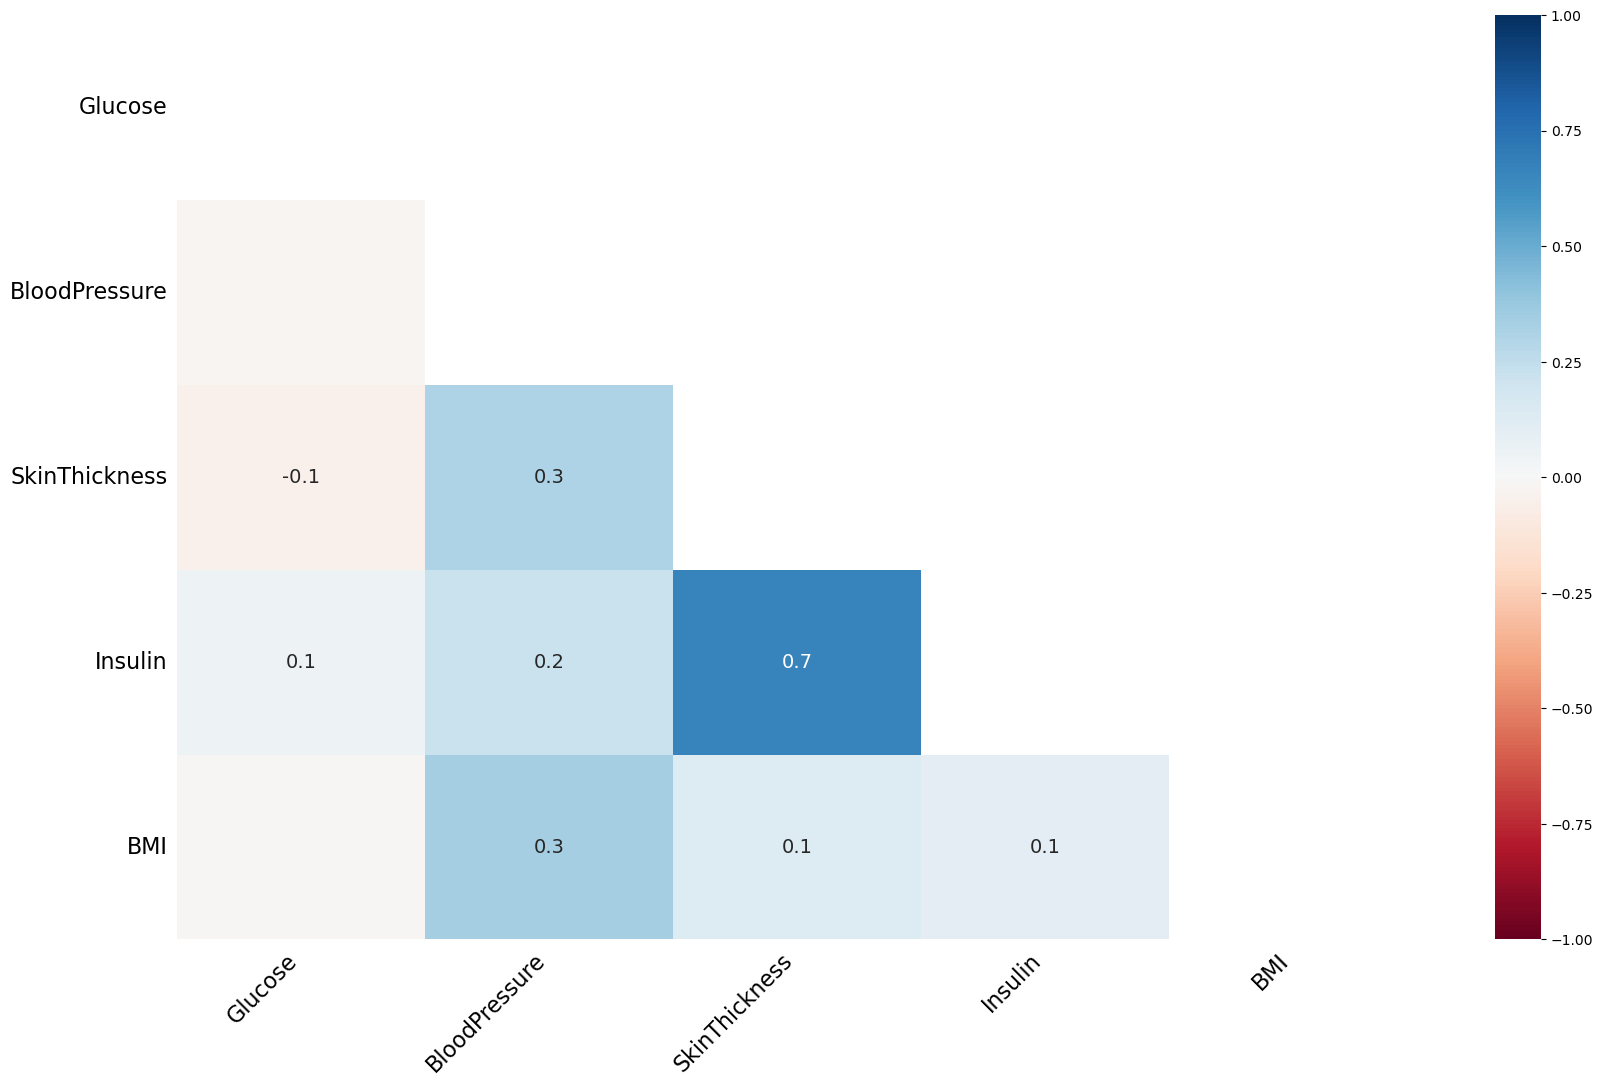

In [26]:
msno.bar(org_data, sort="ascending");
msno.heatmap(org_data);

We see a high correlation between the missing values for SkinThickness and Insulin, this makes a lot of sense since these are the values with more missing data, maybe this is because these tests are not the most commonly performed.

Then we can observe a somewhat correlated missingness between BloodPressure-BMI, and BloodPressure-SkinThickness

### Observing the dendrogram we can visualize this better:

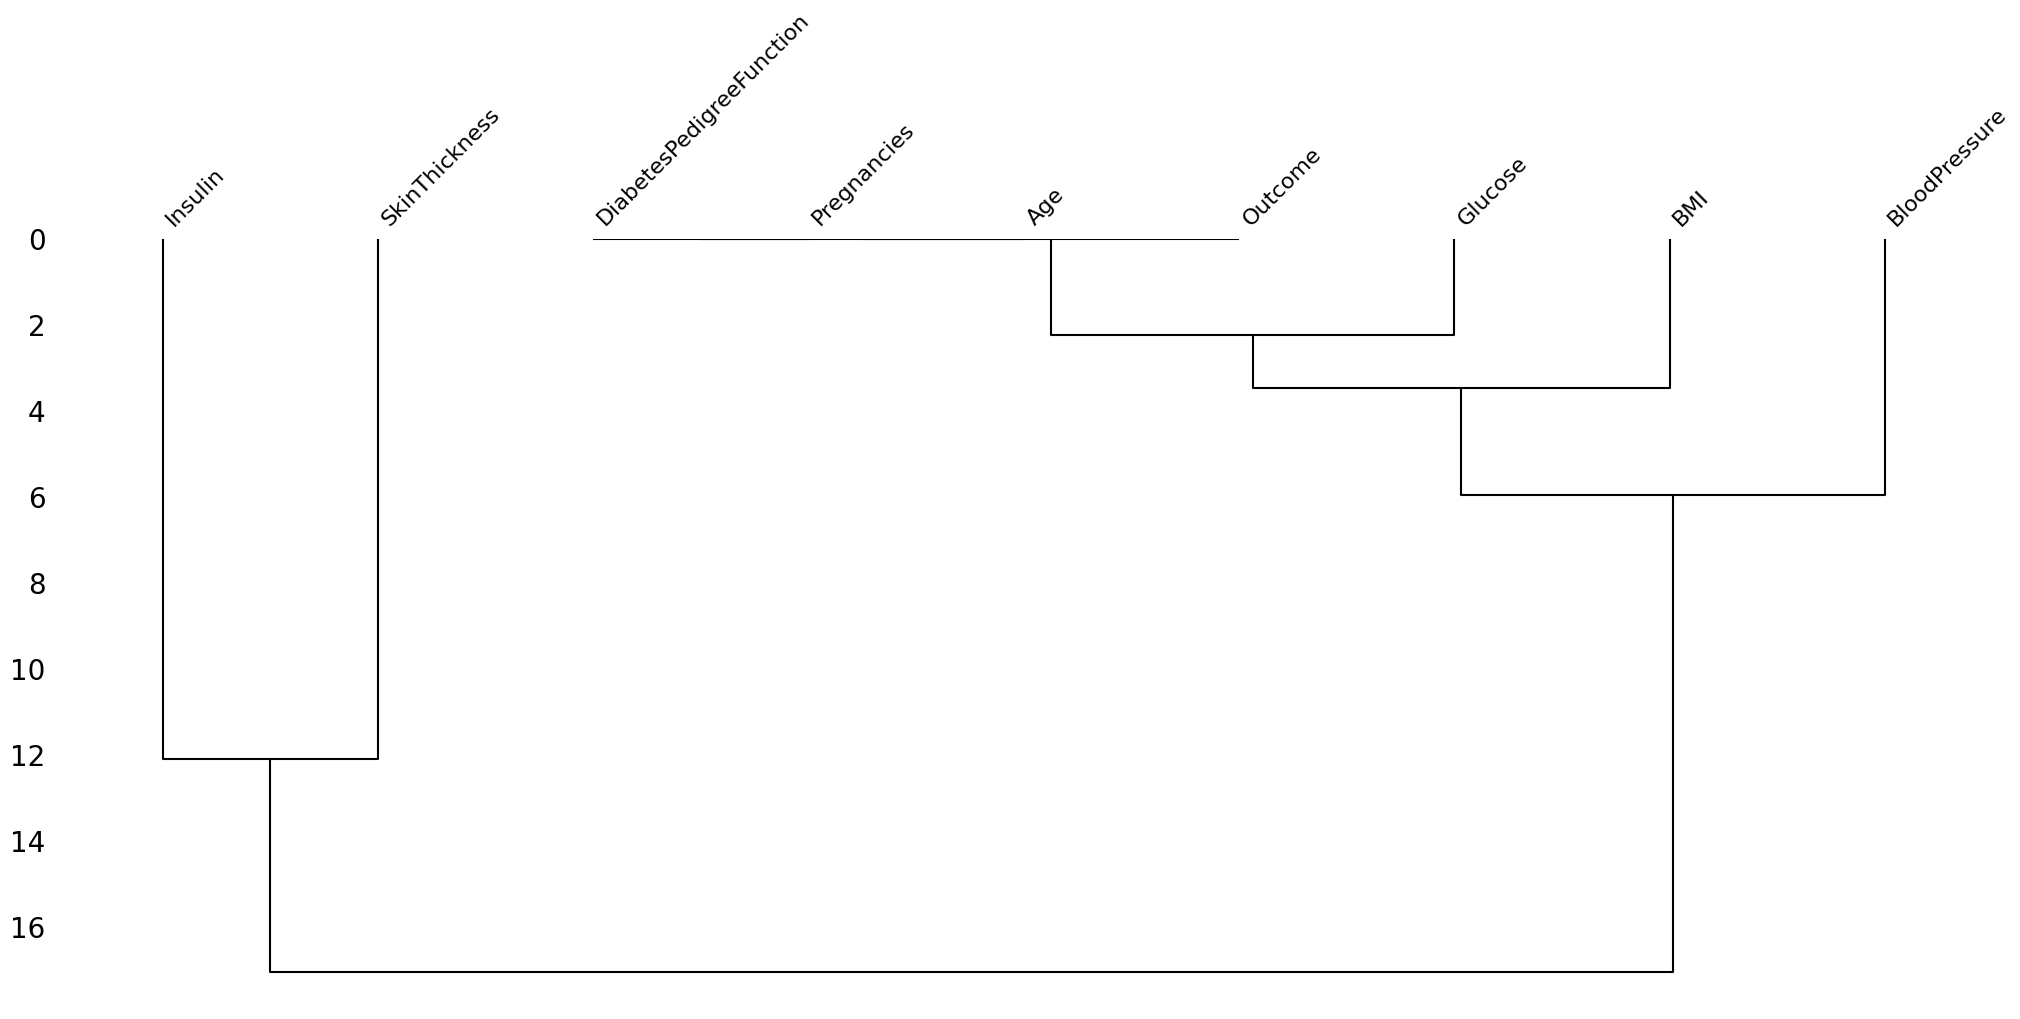

In [29]:
msno.dendrogram(org_data);

### Detailed observations on missingness:

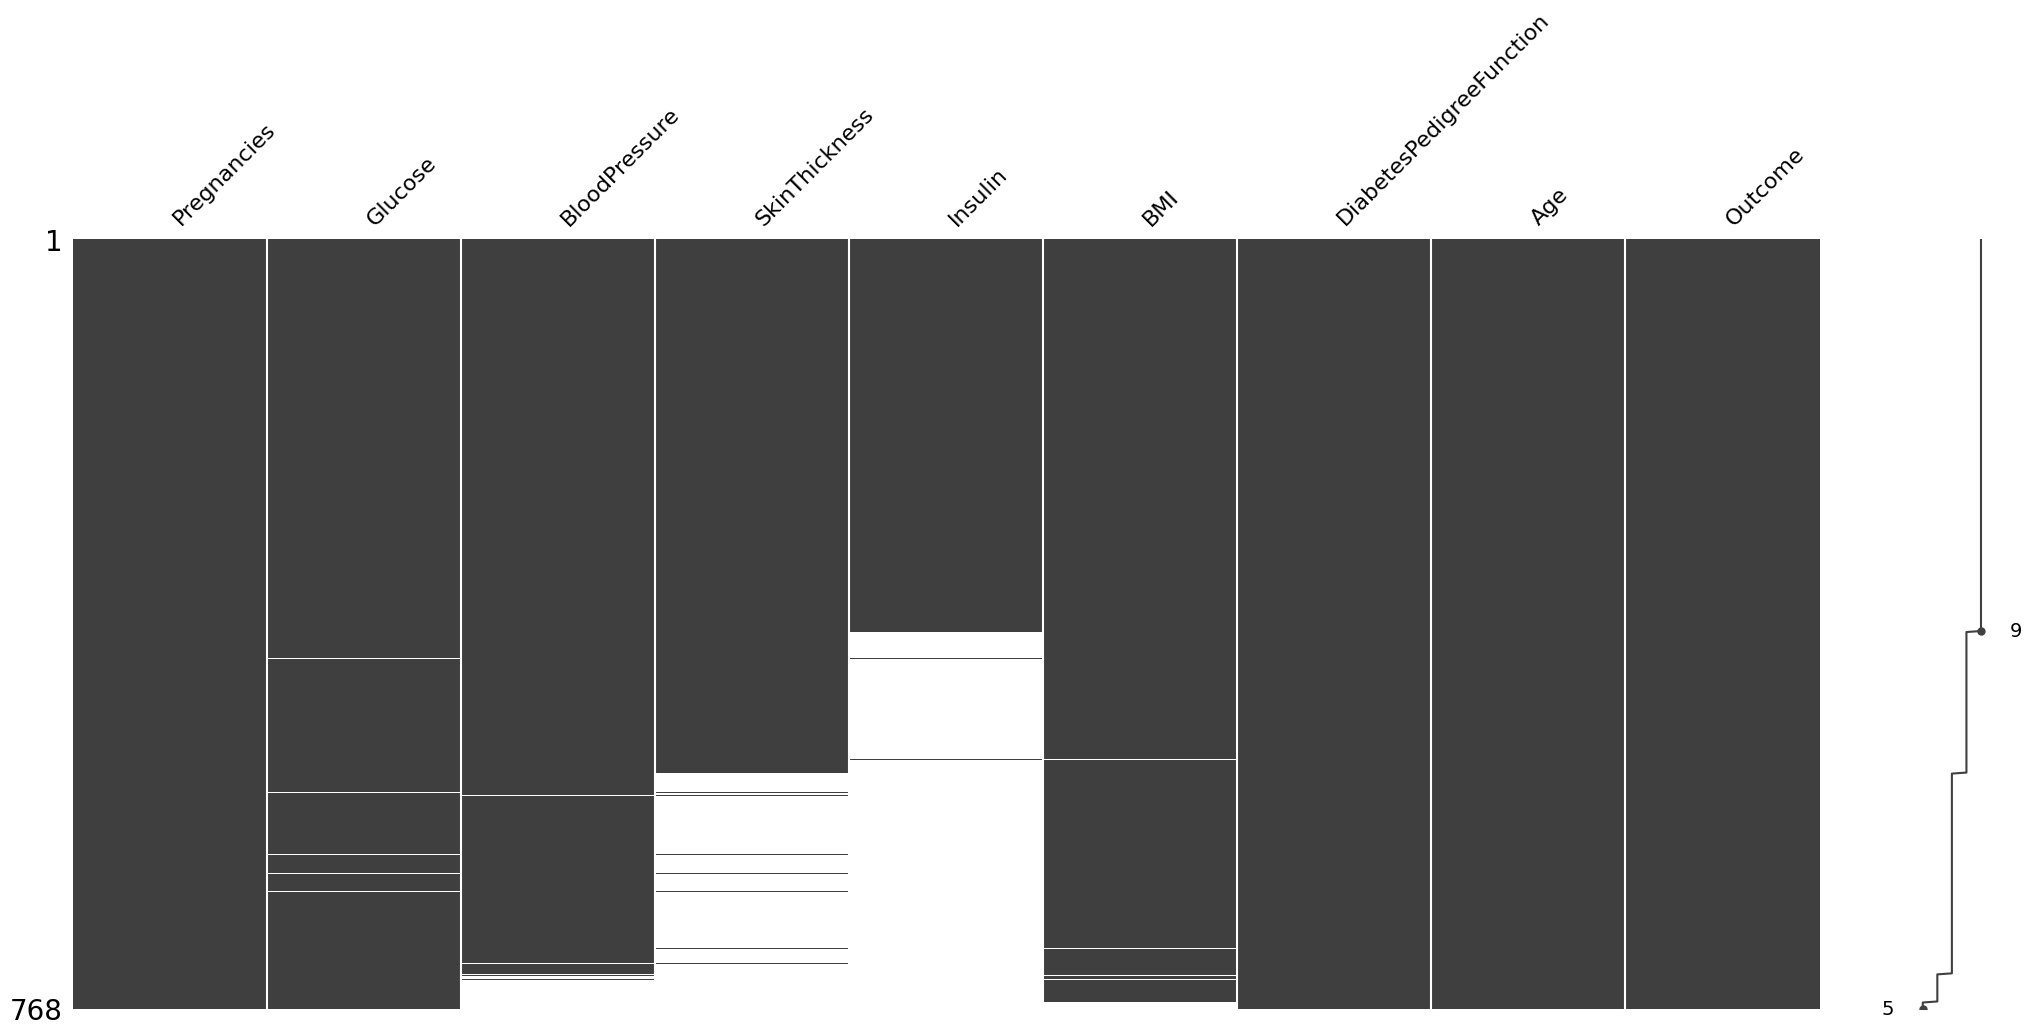

In [30]:
msno.matrix(org_data, sort="descending");

This seems to be very easy to observe correllation of missingness.

We can clearly see that for all the values for which there is data for the insulin, there is data for all of the other parameters.

The same thing seems to happen with BloodPressure, for which in most cases there is data for all the other parameters except Insulin.

It is also notable that Most of the missing values for Blood Pressure and BMI appear in cases in which there is also no data on the other and neither there is data for skin thickness or insulin.

Also notable that missing glucose values are present in all the cases for which there is no BMI or Blood pressure, and in all of those that do not have BMI or BloodPressure do have a glucose value.

In [31]:
# Check the values for skin thickness for missing glucose value
org_data[org_data["Glucose"].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


We also see that all of the missing values for glucose do have a value for the SkinThickness and all the other labels besides Insulin. Which is interesting since SkinThickness has a high degree of missingness.

Having seen all of this it seems that the values are mostly Missing At Random, probably including some Not Missing At Random.

# Imputation phase

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
import scipy.stats as stats

I decided not to look too much on the model parameters since I tried to put focus on the imputation part.

So most of the values are the ones calculated by sklearn, in the decission tree and random forest no prunning or optimizations have been performed.

Also to note that the regression is a simple linear regression based on the non null values on each row.

In [33]:
# Definition of the functions for the imputation methods

def impute_mean(data):
    imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputa.fit(data)
    return pd.DataFrame(imputa.transform(data), columns=data.columns)

def impute_random(data):
    result = data.copy()
    for col in result:
        result.loc[result[col].isnull(), col] = np.random.choice(result[col].dropna(), result[col].isnull().sum(), replace=True)
    return result

def impute_hot_deck(data):
    imputa = KNNImputer(n_neighbors=20)
    imputa.fit(data)
    return pd.DataFrame(imputa.transform(data), columns=data.columns)

def impute_regression(data):
    result = data.copy()

    # Stores different linear regressions for different combinations of missing values
    # The key is a tuple of 1s and 0s, where 1 means that the value for the column is missing
    regressions = {}
    for col in data:
        for row in org_data.loc[data[col].isnull() == 1].index:
            if (res:=tuple(data.loc[row].isnull().values.tolist())) not in regressions:
                reg = LinearRegression()
                regressions[res] = reg
            else:
                reg = regressions[res]
            
            # fits the row depending on the missing values for the other variables
            reg.fit(result[result.isnull().sum(axis=1) == 0].loc[:, ~np.array(res)], result[result.isnull().sum(axis=1) == 0].loc[:, col])
            result.loc[row, col] = reg.predict(result.loc[row, ~np.array(res)].to_numpy().reshape(1, -1))
    return result


In [34]:
# Stores the functions that impute using the different methods
imputers = {
    "Mean": impute_mean,
    "Randomized": impute_random,
    "Hot Deck": impute_hot_deck,
    "Regression": impute_regression
}

# Stores the parameters to calculate the models
models = {
    "GaussianNB":             {"model": lambda: GaussianNB(),             "needs scaling": True, "scaler": lambda: StandardScaler()},
    "MultinomialNB":          {"model": lambda: MultinomialNB(),          "needs scaling": True, "scaler": lambda: StandardScaler(with_mean=False)},
    "DecisionTreeClassifier": {"model": lambda: DecisionTreeClassifier(), "needs scaling": False},
    "RandomForestClassifier": {"model": lambda: RandomForestClassifier(), "needs scaling": False},
    "LogisticRegression":     {"model": lambda: LogisticRegression(),     "needs scaling": True, "scaler": lambda: StandardScaler()}
}

# total: % accuracy of the model in general
# missing: % accuracy of the model in the cases with missing/imputed values
# not_missing: % accuracy of the model in the cases with not missing/not imputed values
prediction_accuracies = {
    "Mean": {
        "GaussianNB":             {"total": 0, "missing": 0, "not_missing": 0},
        "MultinomialNB":          {"total": 0, "missing": 0, "not_missing": 0},
        "DecisionTreeClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "RandomForestClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "LogisticRegression":     {"total": 0, "missing": 0, "not_missing": 0}
    },
    "Randomized": {
        "GaussianNB":             {"total": 0, "missing": 0, "not_missing": 0},
        "MultinomialNB":          {"total": 0, "missing": 0, "not_missing": 0},
        "DecisionTreeClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "RandomForestClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "LogisticRegression":     {"total": 0, "missing": 0, "not_missing": 0}
    },
    "Hot Deck": {
        "GaussianNB":             {"total": 0, "missing": 0, "not_missing": 0},
        "MultinomialNB":          {"total": 0, "missing": 0, "not_missing": 0},
        "DecisionTreeClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "RandomForestClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "LogisticRegression":     {"total": 0, "missing": 0, "not_missing": 0}
    },
    "Regression": {
        "GaussianNB":             {"total": 0, "missing": 0, "not_missing": 0},
        "MultinomialNB":          {"total": 0, "missing": 0, "not_missing": 0},
        "DecisionTreeClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "RandomForestClassifier": {"total": 0, "missing": 0, "not_missing": 0},
        "LogisticRegression":     {"total": 0, "missing": 0, "not_missing": 0}
    }
}

### Calculation of the models:

5 models are created for each imputation type.

In [35]:
for imputer_name, imputer in imputers.items():
    # print(f"{imputer_name:-^55}")
    for model_name, model in models.items():
        # Replacing the missing value using transform method
        imputed_data = imputer(org_data)

        #split data
        x_train, x_test, y_train, y_test = train_test_split(imputed_data.loc[:, imputed_data.columns != "Outcome"], imputed_data["Outcome"], test_size = 0.2, random_state= 1)

        # Scaling the data
        if model["needs scaling"]:
            sc = model["scaler"]()
            # Remove negative values for MultinomialNB
            if model_name == "MultinomialNB":
                for col in x_train:
                    if x_train[col].min() < 0:
                        x_train[col] = x_train[col] - x_train[col].min()
                        x_test[col] = x_test[col] - x_test[col].min()

            #Scale features
            x_train[:] = sc.fit_transform(x_train)
            x_test[:] = sc.fit_transform(x_test)

        mod = model["model"]()
        mod.fit(x_train, y_train)
        y_pred = mod.predict(x_test)
        
        # print(f"{model_name + ':':<40}{(y_pred_nb == y_test.to_numpy()).sum() / y_pred_nb.shape[0] * 100 :.2f}% accuracy")
        # Accuracy of the model in the training data
        prediction_accuracies[imputer_name][model_name]["training"] = (mod.predict(x_train) == y_train.to_numpy()).sum() / x_train.shape[0]
        # Accuracy of the model in the test data
        prediction_accuracies[imputer_name][model_name]["total"] = (y_pred == y_test.to_numpy()).sum() / y_pred.shape[0]

        # Separate both accuracy on imputed data and not imputed data
        test_with_substitutes = org_data[org_data.isna().any(axis=1)][org_data[org_data.isna().any(axis=1)].index.isin(x_test.index)]
        test_without_substitutes = org_data[org_data.index.isin(x_test.loc[y_test.index].index)].drop(test_with_substitutes.index, axis=0)
        x_test["Outcome"] = y_pred

        # Accuracy of the model in the rows with missing values
        prediction_accuracies[imputer_name][model_name]["missing"] = (test_with_substitutes["Outcome"] == x_test["Outcome"][x_test.index.isin(test_with_substitutes.index)].sort_index()).sum() / test_with_substitutes.shape[0]
        # Accuracy of the model with the rows without missing values
        prediction_accuracies[imputer_name][model_name]["not_missing"] = (test_without_substitutes["Outcome"] == x_test["Outcome"][x_test.index.isin(test_without_substitutes.index)].sort_index()).sum() / test_without_substitutes.shape[0]

# Separating imputation methods
predictions_imp = {}
for imputer in imputers:
    predictions_imp[imputer] = pd.DataFrame(prediction_accuracies[imputer]).reindex(["training", "missing", "total", "not_missing"])

# Separating models
predictions_mod = {}
for model in models:
    predictions_mod[model] = pd.concat([predictions_imp["Mean"][model], predictions_imp["Randomized"][model], predictions_imp["Hot Deck"][model], predictions_imp["Regression"][model]], axis=1, keys=["Mean", "Randomized", "Hot Deck", "Regression"])


# Model analysis:

### Imputation methods comparison:

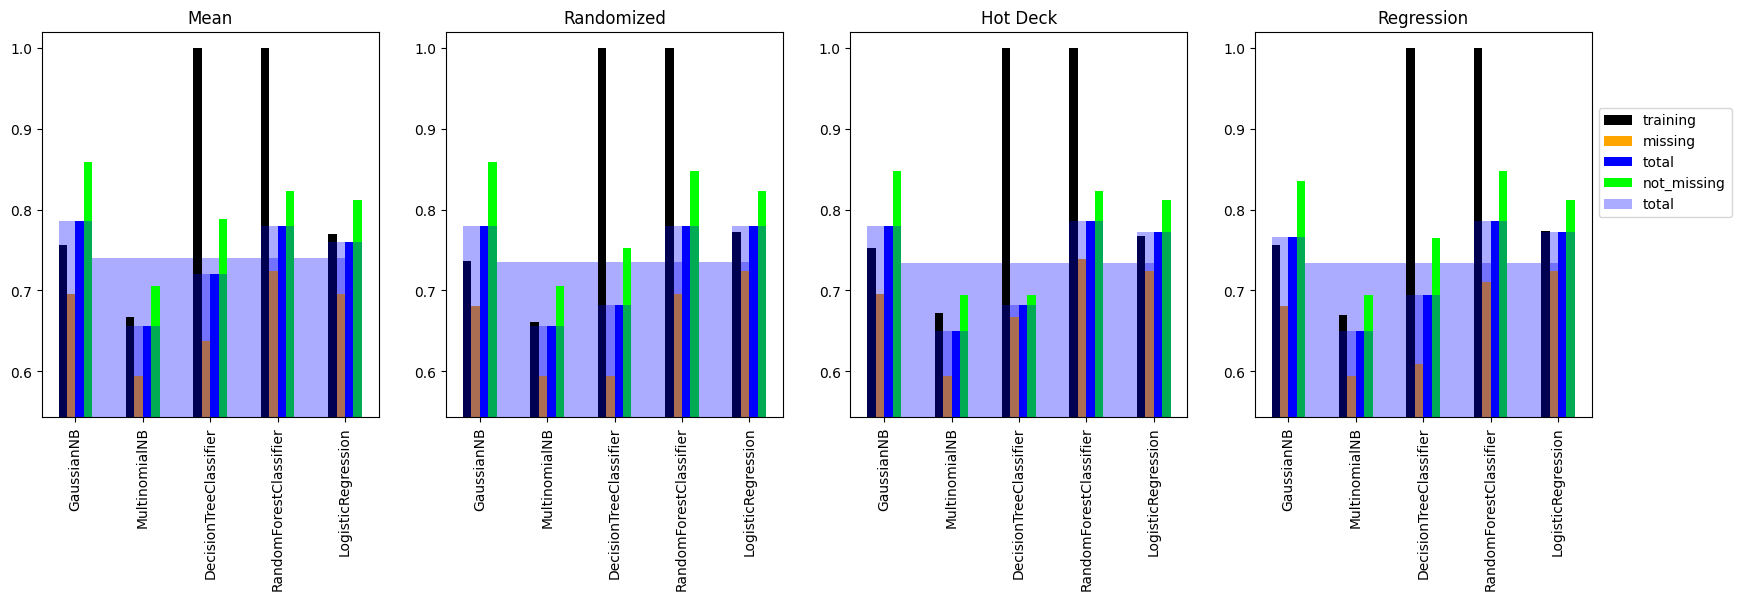

Average accuracy for Mean:       0.74, avg difference between missing and not missing: 0.13
Average accuracy for Randomized: 0.74, avg difference between missing and not missing: 0.14
Average accuracy for Hot Deck:   0.73, avg difference between missing and not missing: 0.09
Average accuracy for Regression: 0.73, avg difference between missing and not missing: 0.13


In [55]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

lower_bound = min(predictions_imp[inputer].min().min() for inputer in imputers) - 0.05
upper_bound = max(predictions_imp[inputer].max().max() for inputer in imputers) + 0.02

for i, imputer_name in enumerate(imputers):
    ax[i].set_ylim([lower_bound, upper_bound])
    ax[i].bar([""], predictions_imp[imputer_name].loc["total"].mean(), alpha=0.33, color="blue", align="edge", width=4)
    if i == 3:
        predictions_imp[imputer_name].transpose().plot.bar(ax=ax[i], title=imputer_name, color=["black", "orange", "blue", "lime"]).legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        predictions_imp[imputer_name].loc["total"].plot.bar(ax=ax[i], title=imputer_name, alpha=0.33, color="blue", legend=False).legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    else:
        predictions_imp[imputer_name].transpose().plot.bar(ax=ax[i], legend=False, title=imputer_name, color=["black", "orange", "blue", "lime"])
        predictions_imp[imputer_name].loc["total"].plot.bar(ax=ax[i], title=imputer_name, alpha=0.33, color="blue")
plt.show()
for imputer in imputers:
    print(f"Average accuracy for {imputer + ':':<11} {predictions_imp[imputer].loc['total'].mean():.2f}, avg difference between missing and not missing: {sum(predictions_imp[imputer].loc['not_missing'] - predictions_imp[imputer].loc['missing']) / 5:.2f}, , avg difference between missing and not missing: {sum(predictions_mod[model].loc['not_missing'] - predictions_mod[model].loc['missing']) / 5:.2f}, avg difference between training and testing: {sum(abs(predictions_mod[model].loc['training'] - predictions_mod[model].loc['total'])) / 5:.2f}"))
        

In this case the performance of the imputation methods does not seem to have a big impact on the performance of the models. It does appear that in every model the accuracy for rows with filled values is significantly less than in those with original values, in this regard Hot deck produces the least difference between accuracy for imputed and not imputed rows.

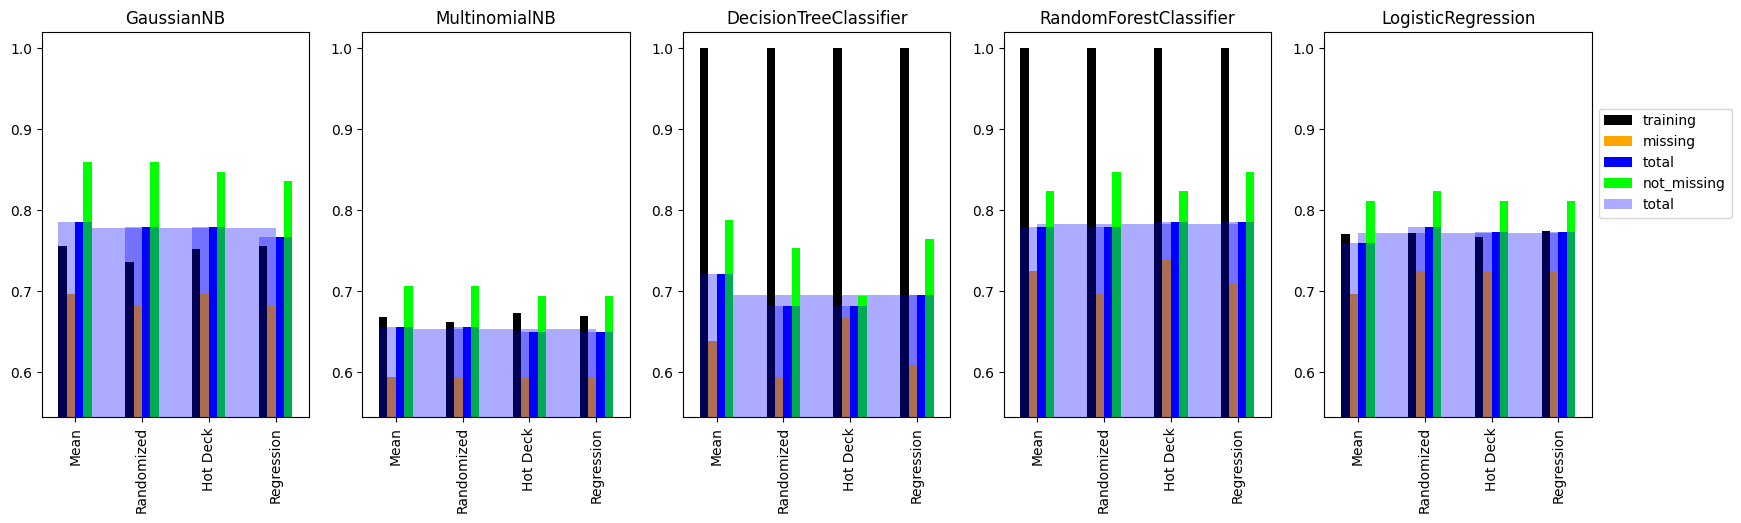

GaussianNB:              Average accuracy 0.78, avg difference between missing and not missing: 0.13, avg difference between training and testing: 0.02
MultinomialNB:           Average accuracy 0.65, avg difference between missing and not missing: 0.08, avg difference between training and testing: 0.01
DecisionTreeClassifier:  Average accuracy 0.69, avg difference between missing and not missing: 0.10, avg difference between training and testing: 0.24
RandomForestClassifier:  Average accuracy 0.78, avg difference between missing and not missing: 0.09, avg difference between training and testing: 0.17
LogisticRegression:      Average accuracy 0.77, avg difference between missing and not missing: 0.08, avg difference between training and testing: 0.00


In [64]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

lower_bound = min(predictions_mod[model].min().min() for model in models) - 0.05
upper_bound = max(predictions_mod[model].max().max() for model in models) + 0.02

for i, model in enumerate(models):
    ax[i].set_ylim([lower_bound, upper_bound])
    ax[i].bar([""], predictions_mod[model].loc["total"].mean(), alpha=0.33, color="blue", align="edge", width=3)
    if i == 4:
        predictions_mod[model].transpose().plot.bar(ax=ax[i], title=model, color=["black", "orange", "blue", "lime"]).legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        predictions_mod[model].loc["total"].plot.bar(ax=ax[i], title=model, alpha=0.33, color="blue").legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    else:
        predictions_mod[model].transpose().plot.bar(ax=ax[i], legend=False, title=model, color=["black", "orange", "blue", "lime"])
        predictions_mod[model].loc["total"].plot.bar(ax=ax[i], title=model, alpha=0.33, color="blue", legend=False)
plt.show()
for model in models: 
    print(f"{model + ':':<24} Average accuracy {predictions_mod[model].loc['total'].mean():.2f}, avg difference between missing and not missing: {sum(predictions_mod[model].loc['not_missing'] - predictions_mod[model].loc['missing']) / 5:.2f}, avg difference between training and testing: {sum(abs(predictions_mod[model].loc['training'] - predictions_mod[model].loc['total'])) / 5:.2f}")

The Random Forest classifier is the one with highest average accuracy, followed by the Gausian Naive Bayes and the Logistic Regression.

These have an maximum average accuracy of 78% on the testing data, which is probably good enough.

For the consistency between training and testing data predictions, all the models have a similar accuracy for both of them, Gaussian Naive Bayes is the one that produces the biggest differences (if we do not take into account Decission Trees and Random Forest).

Since no optimization has been done in the Decission Tree and Random Forest we expect to see a 100% accuracy on the training set, which may not be very good. Still, the Random Forest achieves the best results.

To be honest I do not really know how to do the hypothesis testing for the models, I am going to compute a p-value from an f-statistic generated from the models

My hypothesis is:

$$H_0: y_0 \neq y_1$$
$$H_1: y_0 = y_1$$

I establish an $\alpha = 0.95$, which means that any p-value with a value between 0.1 and 0.9 will reject the null hypothesis.
Thus $H_1$ will not be rejected and indicate that the models are not significantly different.

### Comparison of different imputation methods, same model type:

In [89]:
p_values = {}

# Genereate p_values
for imp1 in imputers:
    for imp2 in imputers:
        if imp1 != imp2:
            for mod in models:
                f_value = predictions_imp[imp1][mod]["total"] / predictions_imp[imp2][mod]["total"]
                df = org_data.shape[0] - org_data.shape[1] - 1
                p_value = stats.f.cdf(f_value, df, df)
                p_values[(imp1, imp2, mod)] = p_value
p_values = pd.DataFrame(p_values, index=["p-value"]).transpose()

In [90]:
# Since the values are repeated (but inversed), we only take the first half
p_values.sort_values(by="p-value").iloc[:p_values.shape[0] // 2]

p-value
Hot Deck   Mean       DecisionTreeClassifier  0.222235
Randomized Mean       DecisionTreeClassifier  0.222235
Regression Mean       DecisionTreeClassifier  0.306763
Mean       Randomized LogisticRegression      0.363769
Regression Mean       GaussianNB              0.364864
Hot Deck   Regression DecisionTreeClassifier  0.397565
Randomized Regression DecisionTreeClassifier  0.397565
Mean       Hot Deck   LogisticRegression      0.407785
           Regression LogisticRegression      0.407785
Regression Hot Deck   GaussianNB              0.408546
           Randomized GaussianNB              0.408546
Hot Deck   Randomized MultinomialNB           0.445543
           Mean       MultinomialNB           0.445543
Regression Randomized MultinomialNB           0.445543
           Mean       MultinomialNB           0.445543
Hot Deck   Randomized LogisticRegression      0.454160
Regression Randomized LogisticRegression      0.454160
Mean       Regression RandomForestClassifier  0.454539
Randomized Hot Deck   RandomForestClassifier  0.454539
Mean       Hot Deck   RandomForestClassifier  0.454539
Hot Deck   Mean       GaussianNB              0.454539
Randomized Mean       GaussianNB              0.454539
           Regression RandomForestClassifier  0.454539
           Mean       MultinomialNB           0.500000
Mean       Randomized MultinomialNB           0.500000
Hot Deck   Randomized GaussianNB              0.500000
           Regression MultinomialNB           0.500000
Regression Hot Deck   MultinomialNB           0.500000
Mean       Randomized RandomForestClassifier  0.500000
Regression Hot Deck   LogisticRegression      0.500000

In [80]:
# Check if there are any p-values outside of the range
p_values[(p_values["p-value"] < 0.1) | (p_values["p-value"] > 0.9)].any()

p-value    False
dtype: bool

Therefore we conclude we can <u>reject</u> all the null hypotheses and not reject the hypotheses $H_1: y_0 = y_1$ for all the models generated.

This tells us that the difference between models generated using different imputation methods but the same model type is not that high.

### Comparison of different model type, same imputation method:

In [183]:
p_values = {}

# Genereate p_values
for mod1 in models:
    for mod2 in models:
        if mod1 != mod2:
            for imp in imputers:
                f_value = predictions_mod[mod1][imp]["total"] / predictions_mod[mod2][imp]["total"]
                df = org_data.shape[0] - org_data.shape[1] - 1
                p_value = stats.f.cdf(f_value, df, df)
                p_values[(mod1, mod2, imp)] = p_value
p_values = pd.DataFrame(p_values, index=["p-value"]).transpose()

# Inspect all the values
p_values.sort_values(by="p-value").iloc[:p_values.shape[0] // 2]

p-value
MultinomialNB          RandomForestClassifier Regression  0.004381
                                              Hot Deck    0.004381
                       GaussianNB             Hot Deck    0.006084
                                              Mean        0.006485
                       LogisticRegression     Hot Deck    0.008371
                                              Regression  0.008371
                                              Randomized  0.008880
                       RandomForestClassifier Randomized  0.008880
                                              Mean        0.008880
                       GaussianNB             Randomized  0.008880
                                              Regression  0.011411
                       LogisticRegression     Mean        0.021550
DecisionTreeClassifier RandomForestClassifier Hot Deck    0.025531
                       GaussianNB             Randomized  0.033113
                       RandomForestClassifier Randomized  0.033113
                       GaussianNB             Hot Deck    0.033113
                       LogisticRegression     Randomized  0.033113
                                              Hot Deck    0.042548
                       RandomForestClassifier Regression  0.045362
                       LogisticRegression     Regression  0.071814
                       GaussianNB             Regression  0.089093
MultinomialNB          DecisionTreeClassifier Mean        0.096978
DecisionTreeClassifier GaussianNB             Mean        0.117638
                       RandomForestClassifier Mean        0.141698
MultinomialNB          DecisionTreeClassifier Regression  0.175930
DecisionTreeClassifier LogisticRegression     Mean        0.234408
MultinomialNB          DecisionTreeClassifier Hot Deck    0.250987
                                              Randomized  0.296507
LogisticRegression     GaussianNB             Mean        0.321826
                       RandomForestClassifier Mean        0.363769
GaussianNB             RandomForestClassifier Regression  0.364864
LogisticRegression     RandomForestClassifier Hot Deck    0.409295
                                              Regression  0.409295
GaussianNB             LogisticRegression     Regression  0.453775
LogisticRegression     GaussianNB             Hot Deck    0.454160
RandomForestClassifier GaussianNB             Mean        0.454539
GaussianNB             RandomForestClassifier Hot Deck    0.454539
RandomForestClassifier GaussianNB             Randomized  0.500000
LogisticRegression     RandomForestClassifier Randomized  0.500000
RandomForestClassifier LogisticRegression     Randomized  0.500000

In this case we do <u>not reject</u> a lot of null hypotheses, for all of the following models:

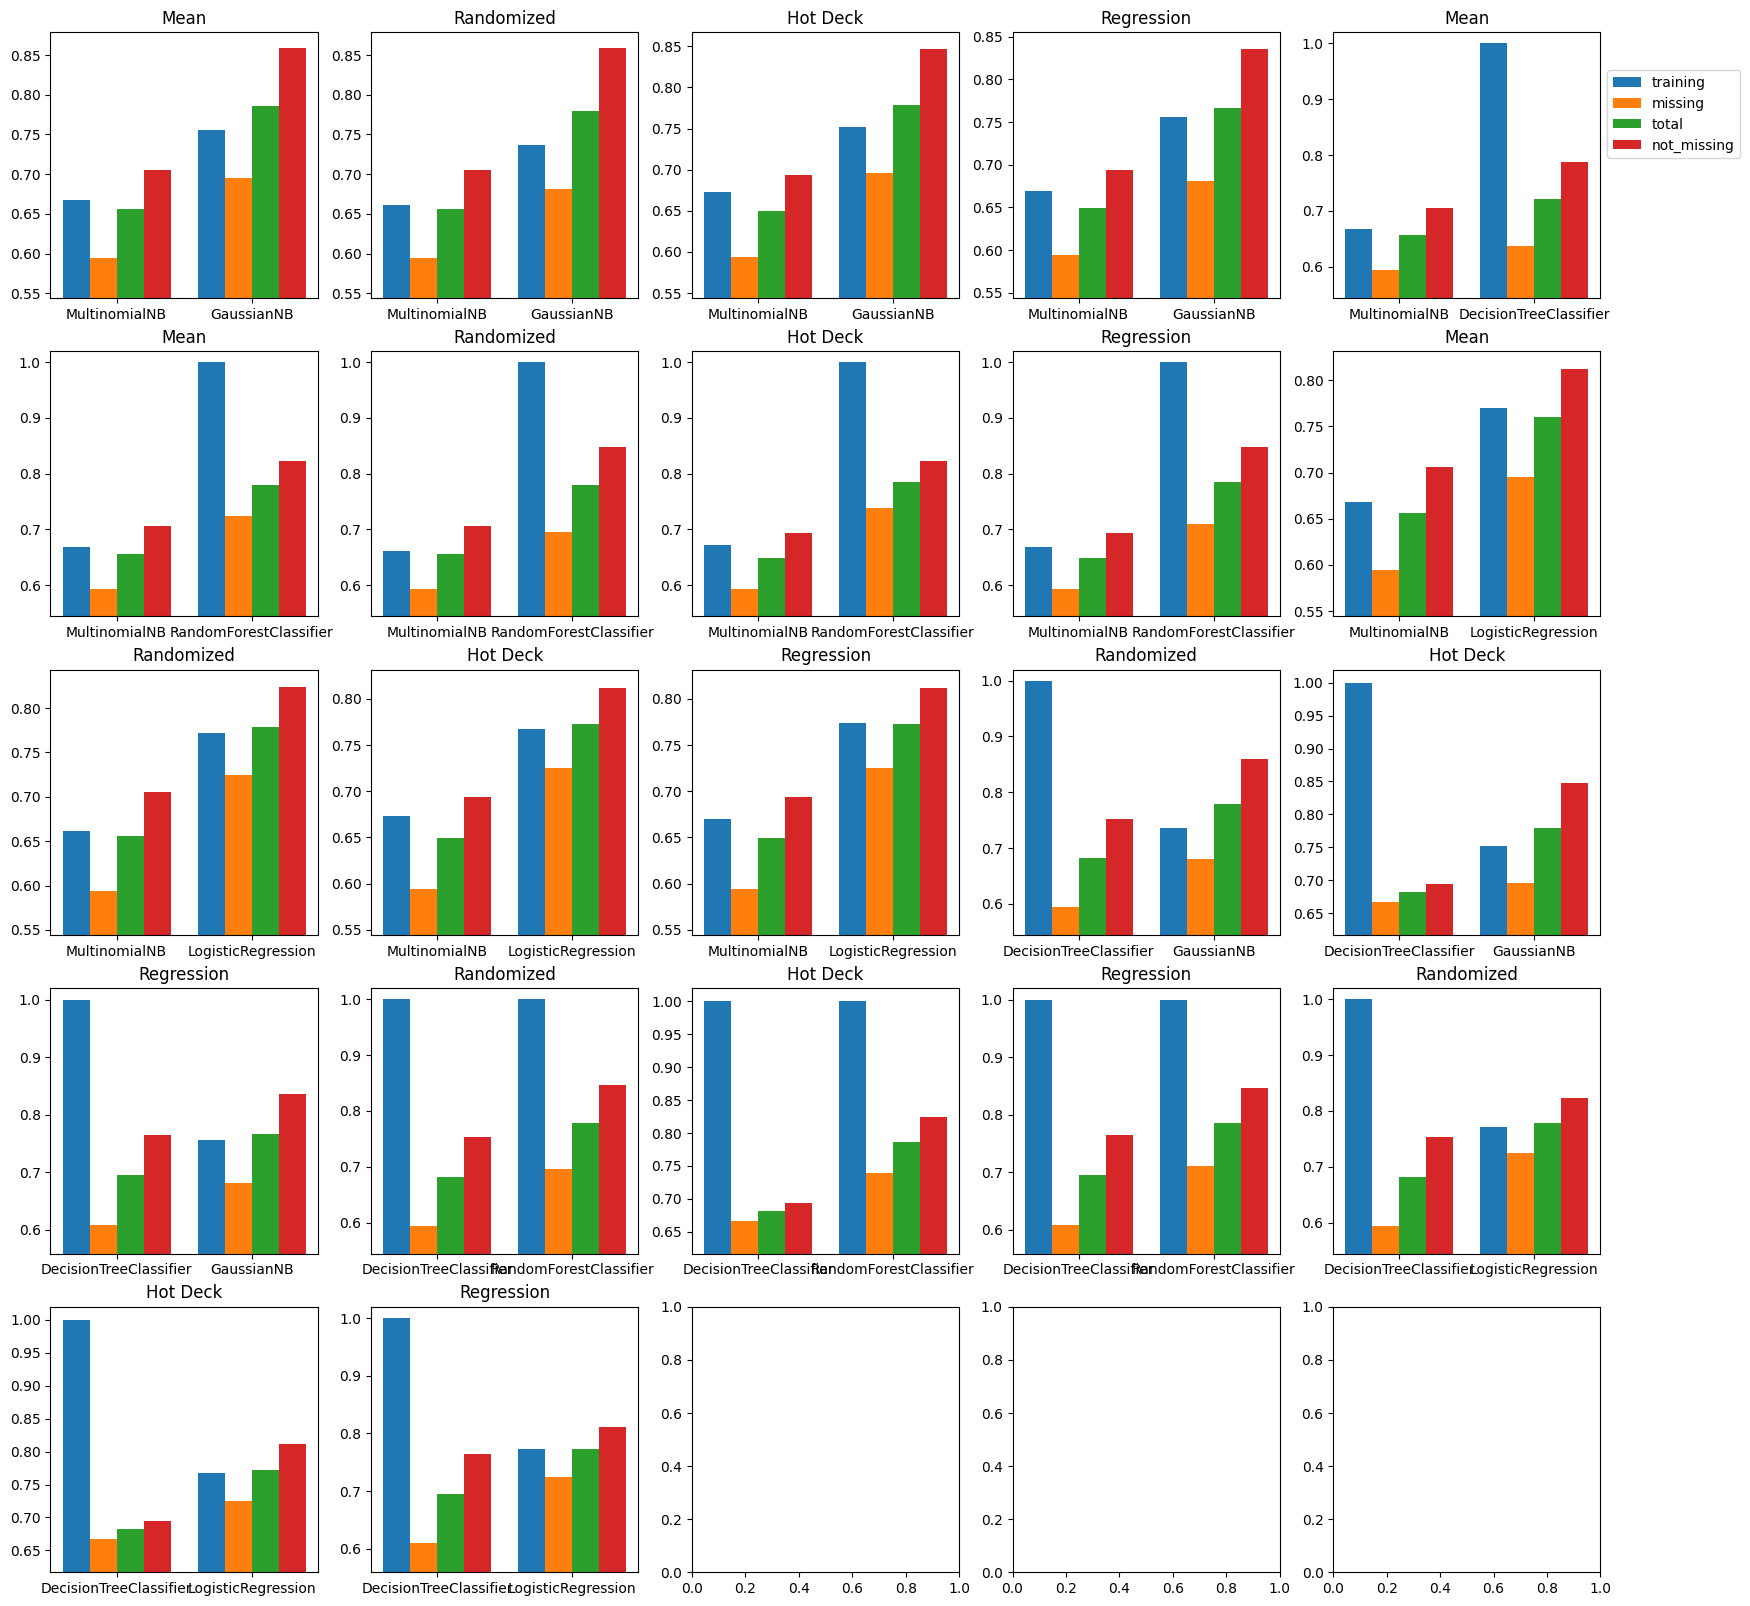

p-value
MultinomialNB          RandomForestClassifier Regression  0.004381
                                              Hot Deck    0.004381
                       GaussianNB             Hot Deck    0.006084
                                              Mean        0.006485
                       LogisticRegression     Regression  0.008371
                                              Hot Deck    0.008371
                       RandomForestClassifier Randomized  0.008880
                       LogisticRegression     Randomized  0.008880
                       GaussianNB             Randomized  0.008880
                       RandomForestClassifier Mean        0.008880
                       GaussianNB             Regression  0.011411
                       LogisticRegression     Mean        0.021550
DecisionTreeClassifier RandomForestClassifier Hot Deck    0.025531
                       LogisticRegression     Randomized  0.033113
                       RandomForestClassifier Randomized  0.033113
                       GaussianNB             Randomized  0.033113
                                              Hot Deck    0.033113
                       LogisticRegression     Hot Deck    0.042548
                       RandomForestClassifier Regression  0.045362
                       LogisticRegression     Regression  0.071814
                       GaussianNB             Regression  0.089093
MultinomialNB          DecisionTreeClassifier Mean        0.096978
DecisionTreeClassifier GaussianNB             Mean        0.117638

In [184]:
fig, ax = plt.subplots(5, 5, figsize=(4*5, 2*10 ))
axes = [(i, j) for i in range(5) for j in range(5)]

for n, mod in enumerate(p_values[p_values["p-value"] < 0.1].index):

    lower_bound = min(predictions_mod[mod[0]][mod[2]].min(), predictions_mod[mod[1]][mod[2]].min()) - 0.05
    upper_bound = max(predictions_mod[mod[0]][mod[2]].max(), predictions_mod[mod[1]][mod[2]].max()) + 0.02

    ax[axes[n]].set_ylim([lower_bound, upper_bound])

    data = {"training": [predictions_mod[mod[0]][mod[2]]["training"], predictions_mod[mod[1]][mod[2]]["training"]],
            "missing": [predictions_mod[mod[0]][mod[2]]["missing"], predictions_mod[mod[1]][mod[2]]["missing"]],
            "total": [predictions_mod[mod[0]][mod[2]]["total"], predictions_mod[mod[1]][mod[2]]["total"]],
            "not_missing": [predictions_mod[mod[0]][mod[2]]["not_missing"], predictions_mod[mod[1]][mod[2]]["not_missing"]]}

    total_width = 0.8
    n_bars = len(data)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax[axes[n]].bar(x + x_offset, y, width=bar_width * 1, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    ax[axes[n]].set_title(mod[2])
    ax[axes[n]].set_xticks((0, 1))
    ax[axes[n]].set_xticklabels((mod[0], mod[1]))
    # Draw legend
    if axes[n] == (0, 4):
        ax[axes[n]].legend(bars, data.keys(), loc='lower left', bbox_to_anchor=(1.0, 0.5))
plt.show()
p_values[p_values["p-value"] < 0.12].sort_values(by="p-value").iloc[:p_values.shape[0] // 2]

From this we can understand that there is <u>more significance on the type of model</u> that we decided to create than on the type of imputation, still, we see differences on the performance of the models depending on the imputation type.

It may be because of the specific underlying factors that determine the Outcome variable that this data is not very sensitive to differences on imputing, but certainly there is a challenge in the process of dealing with missing values.

I have not had a lot of time to experiment with the models, but I look forward to improving my ability to optimize the way they work to obtain the best results possible.

I decide to only compare the models that have at least one thing in common, otherwise I would not know the significance of the comparison, specially since there are so many models to compare.